## Problem Statement Summary: Predicting Demand for Shared Bikes

The task at hand involves building a predictive model for estimating the demand for shared bikes using multiple linear regression. The company, BoomBikes, is experiencing revenue declines due to the ongoing pandemic and aims to revitalize its business strategy post-lockdown. To achieve this, the company seeks to understand the factors influencing bike demand in the American market and leverage this insight to cater to customer needs effectively.

*Key Information*:
- Target Variable: The target variable is represented by the 'cnt' column, which denotes the total number of bike rentals, including both casual and registered users.
- Independent Variables: Various factors affecting bike demand, such as weather conditions ('weathersit'), season ('season'), and year ('yr'), have been gathered through meteorological surveys and market data.
- Goal of the Analysis: The primary objective is to model the demand for shared bikes using the available independent variables. This model will aid management in understanding demand dynamics, devising effective business strategies, and meeting customer expectations post-lockdown.
"""


## Step 1: Reading and Understanding the Data

In [486]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [551]:
# Importing all required packages
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [488]:
# Read the Data
bike=pd.read_csv("day.csv")

In [489]:
# Check the head of the dataset

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [490]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [491]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [492]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [493]:
bike.shape

(730, 12)

In [494]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [495]:
# renaming few columns for better readibility

bike.rename(columns={'yr': 'year', 'mnth': 'month', 'hum': 'humidity'}, inplace=True)


In [496]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [497]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_boxplots(df_name, column_list):
    """
    Creates box plots for each column in the DataFrame.

    Parameters:
    df_name (pd.DataFrame): The DataFrame.
    column_list (list): A list of column names to be plotted.

    Returns:
    None
    """
    # Set the size of the figure
    plt.figure(figsize=(15, 5))

    # Define a custom color palette
    custom_palette = sns.color_palette("Paired")

    # Loop through each column and create box plots
    for i, column in enumerate(column_list):
        plt.subplot(1, len(column_list), i + 1)
        sns.boxplot(x=df_name[column], color=custom_palette[i % len(custom_palette)])
        plt.title(f'Box plot of {column}')
        plt.xlabel(column)

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming df is your DataFrame and column_list is a list of column names


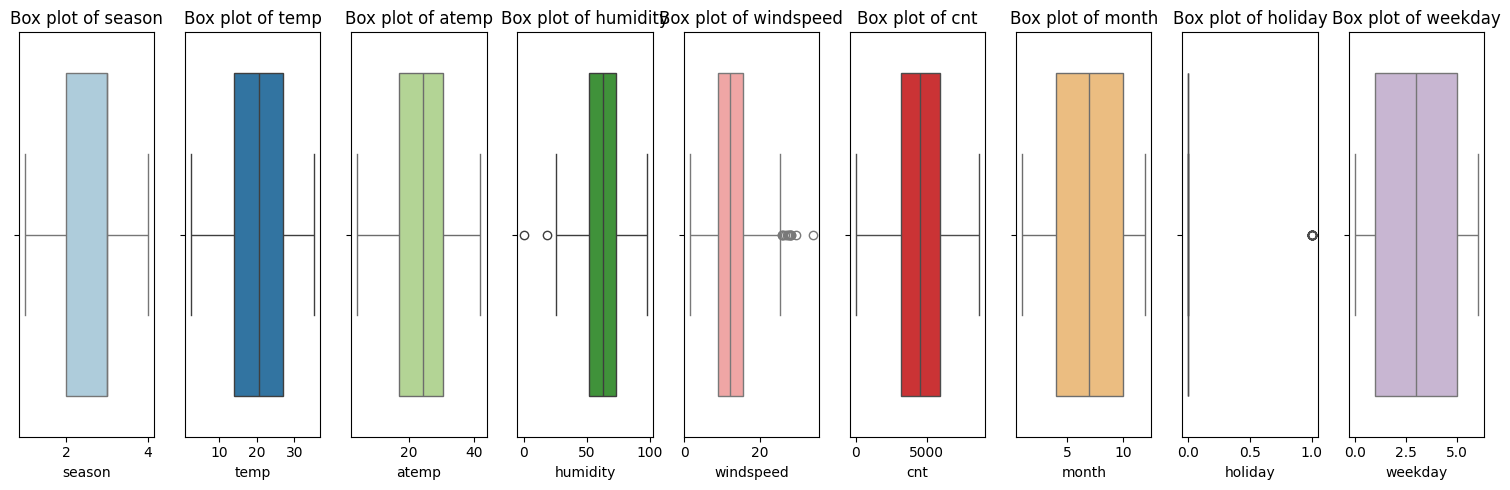

In [498]:
# Example usage:
# Assuming df is your DataFrame and column_list is a list of column names
# (df, column_list)

create_boxplots(bike, ["season","temp","atemp","humidity","windspeed","cnt","month","holiday","weekday"])


Insight

There are few outliers in windspeed and humidity features lets replace them with upper and lower bound values. 

In [499]:
import pandas as pd

def replace_outliers_with_bounds(df_name, column_list):
    """
    Replaces outliers in specified columns of the DataFrame with their upper and lower bounds.

    Parameters:
    df_name (pd.DataFrame): The DataFrame.
    column_list (list): A list of column names in which outliers are to be replaced.

    Returns:
    pd.DataFrame: The DataFrame with outliers replaced.
    """
    for column in column_list:
        # Calculate Q1, Q3, and IQR for the current column
        Q1 = df_name[column].quantile(0.25)
        Q3 = df_name[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers in the current column
        df_name.loc[df_name[column] < lower_bound, column] = lower_bound
        df_name.loc[df_name[column] > upper_bound, column] = upper_bound

    return df_name

# Example usage:
# Assuming df is your DataFrame and column_list is a list of column names
df_cleaned = replace_outliers_with_bounds(bike, ["humidity","windspeed"])


In [500]:
X_train

,year,holiday,workingday,temp,atemp,humidity,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light Rain,Mist,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.461512,0.413569,0,0,0,...,0,0,0,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.652079,0.363923,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.543728,0.351077,0,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.363506,0.911723,0,1,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.371673,0.259139,0,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.762183,0.500170,0.488919,0,0,0,...,0,0,0,1,0,0,1,0,1,0
578,1,0,1,0.863973,0.824359,0.593819,0.257304,1,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.218747,0.284722,0.153138,0,0,1,...,0,0,0,0,0,0,0,1,0,0
350,0,0,1,0.248216,0.223544,0.464778,0.593715,0,1,0,...,0,0,0,0,0,0,1,0,0,1


Insight

Now you can see there are no outliers.

In [501]:
# Define a mapping dictionary for weathersit with shorter abbreviations
weathersit_mapping = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Rain',
    4: 'Heavy Rain'
}





# Define a mapping dictionary for season
season_mapping = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

weekday_mapping={
    0:'sun',
    1:'mon',
    2:'tue',
    3:'wed',
    4:'thu',
    5:'fri',
    6:'sat'
    }

month_mapping={
    1:'jan',
    2:'feb',
    3:'mar',
    4:'apr',
    5:'may',
    6:'june',
    7:'july',
    8:'aug',
    9:'sep',
    10:'oct',
    11:'nov',
    12:'dec'

}


In [502]:
# Convert numerical values to categorical string values
bike['weathersit'] = bike['weathersit'].map(weathersit_mapping)
bike['season'] = bike['season'].map(season_mapping)
bike["weekday"]=bike["weekday"].map(weekday_mapping)
bike["month"]=bike["month"].map(month_mapping)

In [503]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


From your analysis of the categorical variables from the dataset, what could you infer about 
their effect on the dependent variable?  

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [504]:
# sns.pairplot(bike)
# plt.show()

# Insight
- 

In [505]:

def plot_cat_columns(cat_columns, data):
    num_columns = len(cat_columns)
    num_rows = num_columns
    num_cols = 2
    
    # Set up the figure and axes
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    
    # Iterate over categorical columns
    for i, column in enumerate(cat_columns):
        # Calculate mean values for each category and sort in descending order
        mean_values = data.groupby(column)['cnt'].mean().sort_values(ascending=False)
        
        # Plot without hue
        plt.subplot(num_rows, num_cols, i*2+1)
        sns.barplot(x=mean_values.index, y=mean_values.values, palette='Set1')
        plt.title(f'Bar Plot of {column} vs cnt')
        plt.xlabel(column)
        plt.ylabel('cnt')
        
        # Plot with hue='year'
        plt.subplot(num_rows, num_cols, i*2+2)
        sns.barplot(x=column, y='cnt', data=data, hue='year', palette='Set1', order=mean_values.index)
        plt.title(f'Bar Plot of {column} vs cnt (wrt Year)')
        plt.xlabel(column)
        plt.legend(labels=['2018', '2019'])  # Adding legend
        
    plt.tight_layout()





In [506]:
def plot_cat_columns(cat_columns, data):
    num_columns = len(cat_columns)
    num_rows = num_columns
    num_cols = 2
    
    # Set up the figure and axes
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    
    # Iterate over categorical columns
    for i, column in enumerate(cat_columns):
        # Calculate mean values for each category and sort in descending order
        mean_values = data.groupby(column)['cnt'].mean().sort_values(ascending=False)
        
        # Plot without hue
        plt.subplot(num_rows, num_cols, i*2+1)
        sns.barplot(x=mean_values.index, y=mean_values.values, palette='Set1')
        plt.title(f'Bar Plot of {column} vs cnt')
        plt.xlabel(column)
        plt.ylabel('cnt')
        
        # Plot with hue='year'
        plt.subplot(num_rows, num_cols, i*2+2)
        sns.barplot(x=column, y='cnt', data=data, hue='year', palette='Set1', order=mean_values.index)
        plt.title(f'Bar Plot of {column} vs cnt (wrt Year)')
        plt.xlabel(column)
        handles, labels = plt.gca().get_legend_handles_labels()
        custom_handles = [plt.Line2D([0], [0], color='red', lw=4), plt.Line2D([0], [0], color='blue', lw=4)]
        plt.legend(custom_handles, ['2018', '2019'])

    plt.tight_layout()




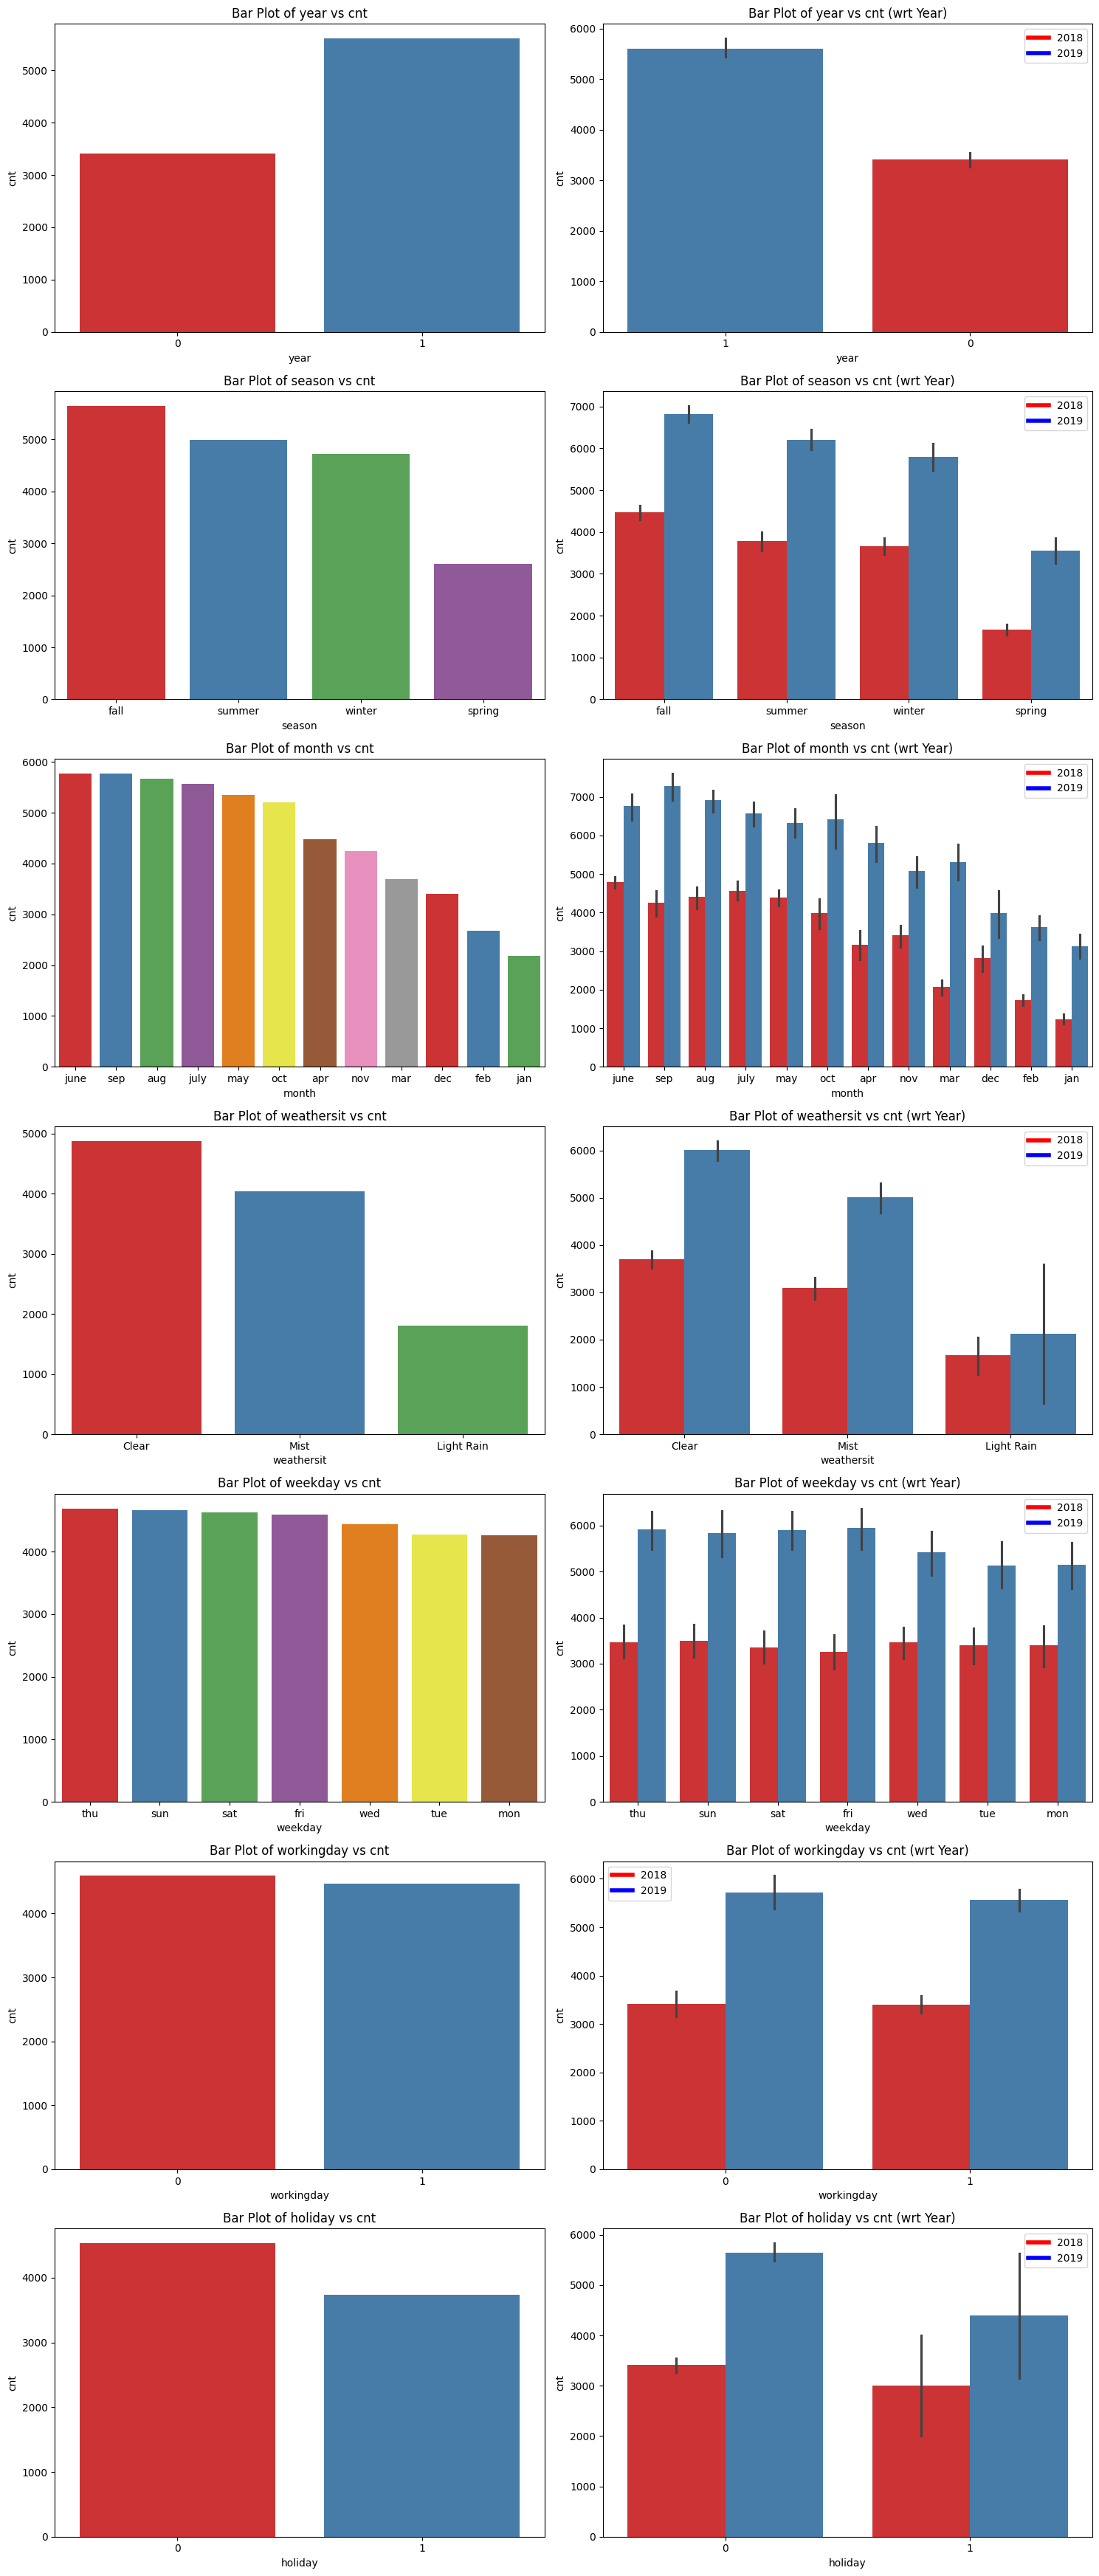

In [507]:
# Assuming 'bike' is your DataFrame
plot_cat_columns(["year",'season', 'month', 'weathersit', 'weekday',"workingday","holiday"], bike)

Insights

1. Over all count of total rental bikes have increased from 2018 to 2019
2. Fall season is the most favourable time when people are renting bikes for both the years with spring season the least. 
3. June, September, August Month are the months with highest rentals with December, Jan and Feb with the least. 
4. When the weather is clear people are renting the bikes highest with nill during heavy rain and very less during light rain
5. Thursay to Sunday people are renting the bikes frequently but the number drops between monday to wednesday
6. Intrestingly the count of total rental come down for weekends and holiday in 2019 compared to 2018.

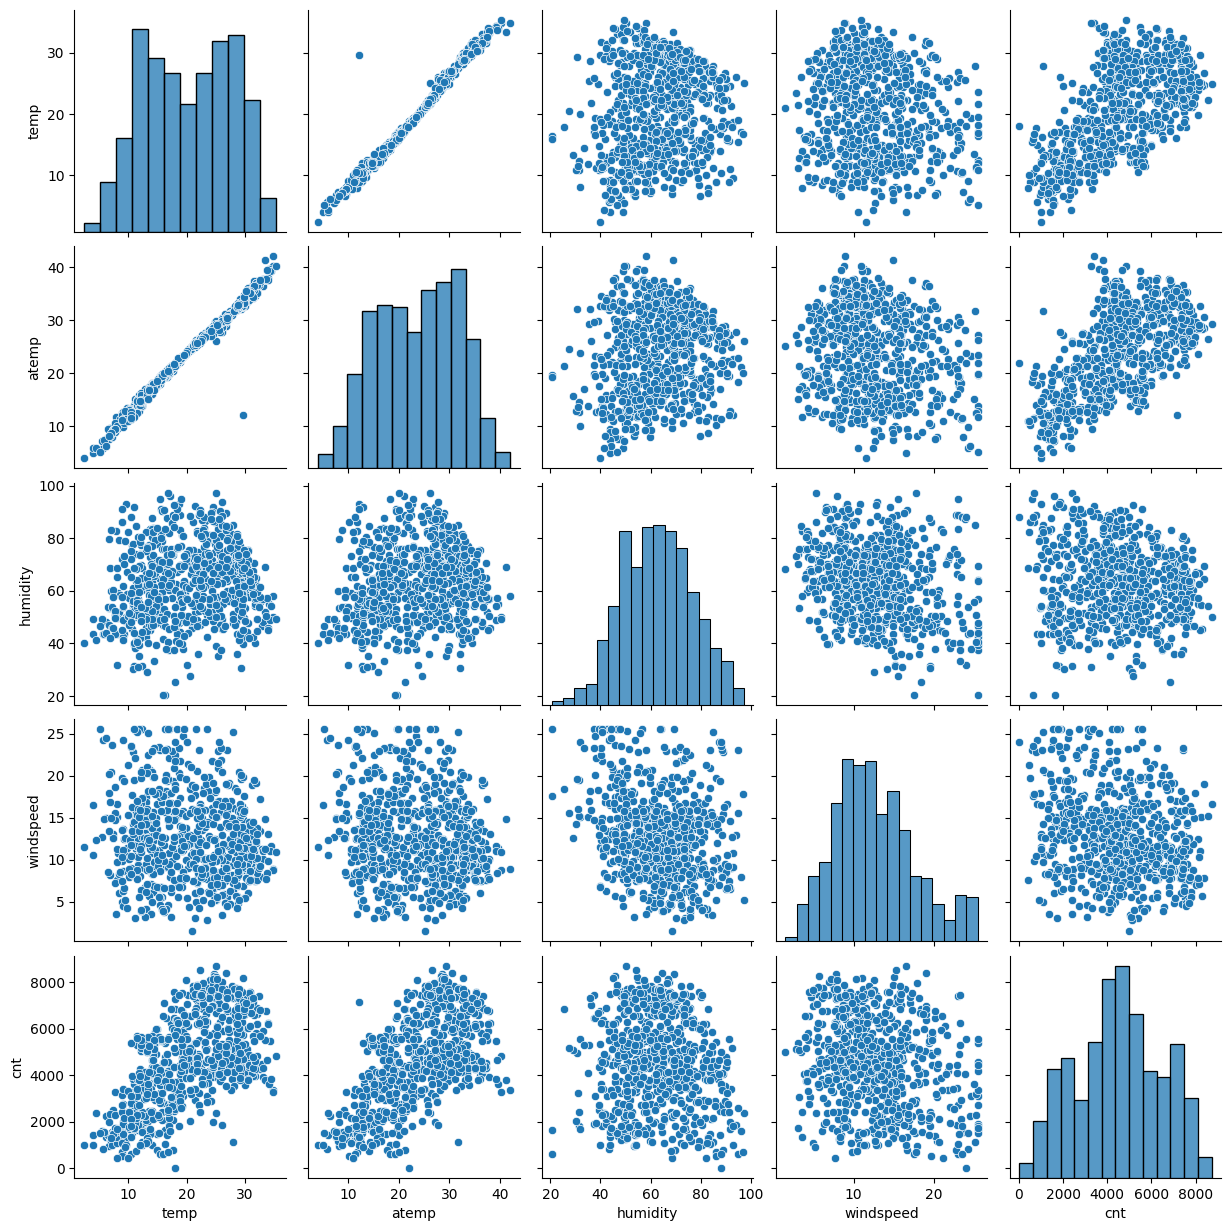

In [508]:
# Create the pair plot
sns.pairplot(data=bike,vars=["temp","atemp","humidity","windspeed","cnt"])
plt.show()

In [509]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [510]:
bike.dtypes

season         object
year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
humidity      float64
windspeed     float64
cnt             int64
dtype: object

In [511]:
# Dummy variable creation for month, weekday, weathersit and season variables and dropping those columns



def create_dummy_variables(data, columns):
    """
    Create dummy variables for the specified categorical columns in the DataFrame and drop the original columns.
    
    Parameters:
    data (DataFrame): The input DataFrame.
    columns (list): List of column names for which dummy variables should be created.
    
    Returns:
    DataFrame: The DataFrame with dummy variables created and original columns dropped.
    """
    # Create dummy variables for each column in the list
    dummy_variables = pd.get_dummies(data[columns], drop_first=True, dtype=int, prefix='', prefix_sep='')
    
    # Drop original categorical columns from the DataFrame
    data.drop(columns, axis=1, inplace=True)
    
    # Concatenate dummy variables with the DataFrame
    data = pd.concat([data, dummy_variables], axis=1)
    
    return data




In [512]:
bike = create_dummy_variables(bike, ['month', 'weekday', 'weathersit', 'season'])


In [513]:
num_cols = [col for col in bike.columns if bike[col].dtype != 'O']

In [514]:
num_cols

['year',
 'holiday',
 'workingday',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'cnt',
 'aug',
 'dec',
 'feb',
 'jan',
 'july',
 'june',
 'mar',
 'may',
 'nov',
 'oct',
 'sep',
 'mon',
 'sat',
 'sun',
 'thu',
 'tue',
 'wed',
 'Light Rain',
 'Mist',
 'spring',
 'summer',
 'winter']

Insight:

Both ```temp``` and ```atemp``` cannot be used in the model due to multicolinearity as there is 99% correlation between them. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

## Step 3: Data Preparation

In [515]:
# Dummy variable creation for month, weekday, weathersit and season variables and dropping those columns



def create_dummy_variables(data, columns):
    """
    Create dummy variables for the specified categorical columns in the DataFrame and drop the original columns.
    
    Parameters:
    data (DataFrame): The input DataFrame.
    columns (list): List of column names for which dummy variables should be created.
    
    Returns:
    DataFrame: The DataFrame with dummy variables created and original columns dropped.
    """
    # Create dummy variables for each column in the list
    dummy_variables = pd.get_dummies(data[columns], drop_first=True, dtype=int, prefix='', prefix_sep='')
    
    # Drop original categorical columns from the DataFrame
    data.drop(columns, axis=1, inplace=True)
    
    # Concatenate dummy variables with the DataFrame
    data = pd.concat([data, dummy_variables], axis=1)
    
    return data




In [516]:
bike.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light Rain,Mist,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [517]:
bike.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar',
       'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Light Rain', 'Mist', 'spring', 'summer', 'winter'],
      dtype='object')

In [518]:
bike.shape

(730, 30)

In [519]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   humidity    730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   aug         730 non-null    int32  
 9   dec         730 non-null    int32  
 10  feb         730 non-null    int32  
 11  jan         730 non-null    int32  
 12  july        730 non-null    int32  
 13  june        730 non-null    int32  
 14  mar         730 non-null    int32  
 15  may         730 non-null    int32  
 16  nov         730 non-null    int32  
 17  oct         730 non-null    int32  
 18  sep         730 non-null    int32  
 19  mon         730 non-null    i

## Step 4: Splitting the Data into Training and Testing Sets

In [520]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 42)

### Rescaling the Features 



In [521]:
# Apply scaler() to all the columns except the '1-0' and 'dummy' variables


def non_categorical_non_binary_columns(data):
    non_cat_non_binary_columns = []
    for column in data.columns:
        if data[column].dtype in ["int32",'int64', 'float64']:  # Check if the column is numerical
            unique_values = data[column].unique()
            if len(unique_values) > 2 or not all(value in [0, 1] for value in unique_values):  # Check if unique values are not only 0 and 1
                non_cat_non_binary_columns.append(column)
    return non_cat_non_binary_columns

# Usage
num_vars = non_categorical_non_binary_columns(bike)
print(num_vars)



['temp', 'atemp', 'humidity', 'windspeed', 'cnt']


In [522]:
scaler = MinMaxScaler()

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [523]:
bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light Rain,Mist,spring,summer,winter
683,1,0,1,0.327133,0.322150,0.542639,0.364559,0.605336,0,0,...,0,0,0,0,0,0,1,0,0,1
645,1,1,0,0.403972,0.404998,0.659157,0.466986,0.609320,0,0,...,0,0,0,1,0,0,1,0,0,1
163,0,0,1,0.717562,0.685963,0.378207,0.789884,0.554026,0,0,...,0,0,0,0,1,0,0,0,1,0
360,0,0,1,0.331287,0.326273,0.728306,0.463555,0.088253,0,1,...,0,0,1,0,0,0,1,1,0,0
640,1,0,1,0.745598,0.682653,0.769141,0.123257,0.862127,0,0,...,0,0,1,0,0,0,1,0,0,1


In [524]:
bike_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light Rain,Mist,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.521569,0.027451,0.698039,0.551091,0.526680,0.561516,0.461496,0.498206,0.074510,0.074510,...,0.143137,0.133333,0.135294,0.156863,0.133333,0.029412,0.345098,0.231373,0.256863,0.250980
std,0.500025,0.163554,0.459559,0.227401,0.213153,0.180000,0.205402,0.233905,0.262857,0.262857,...,0.350557,0.340268,0.342373,0.364028,0.340268,0.169124,0.475867,0.422124,0.437332,0.434003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354176,0.352585,0.421794,0.314220,0.345950,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575824,0.564951,0.567958,0.427934,0.502233,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745338,0.698389,0.691553,0.585898,0.677080,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Top 10 correlations:
    Feature1    Feature2  Correlation
123    atemp        temp     0.996588
814   spring       atemp     0.646852
214      cnt       atemp     0.641676
813   spring        temp     0.639100
213      cnt        temp     0.633771
602      sat  workingday     0.621420
817   spring         cnt     0.598976
632      sun  workingday     0.596359
821   spring         jan     0.566998
886   winter         nov     0.550408


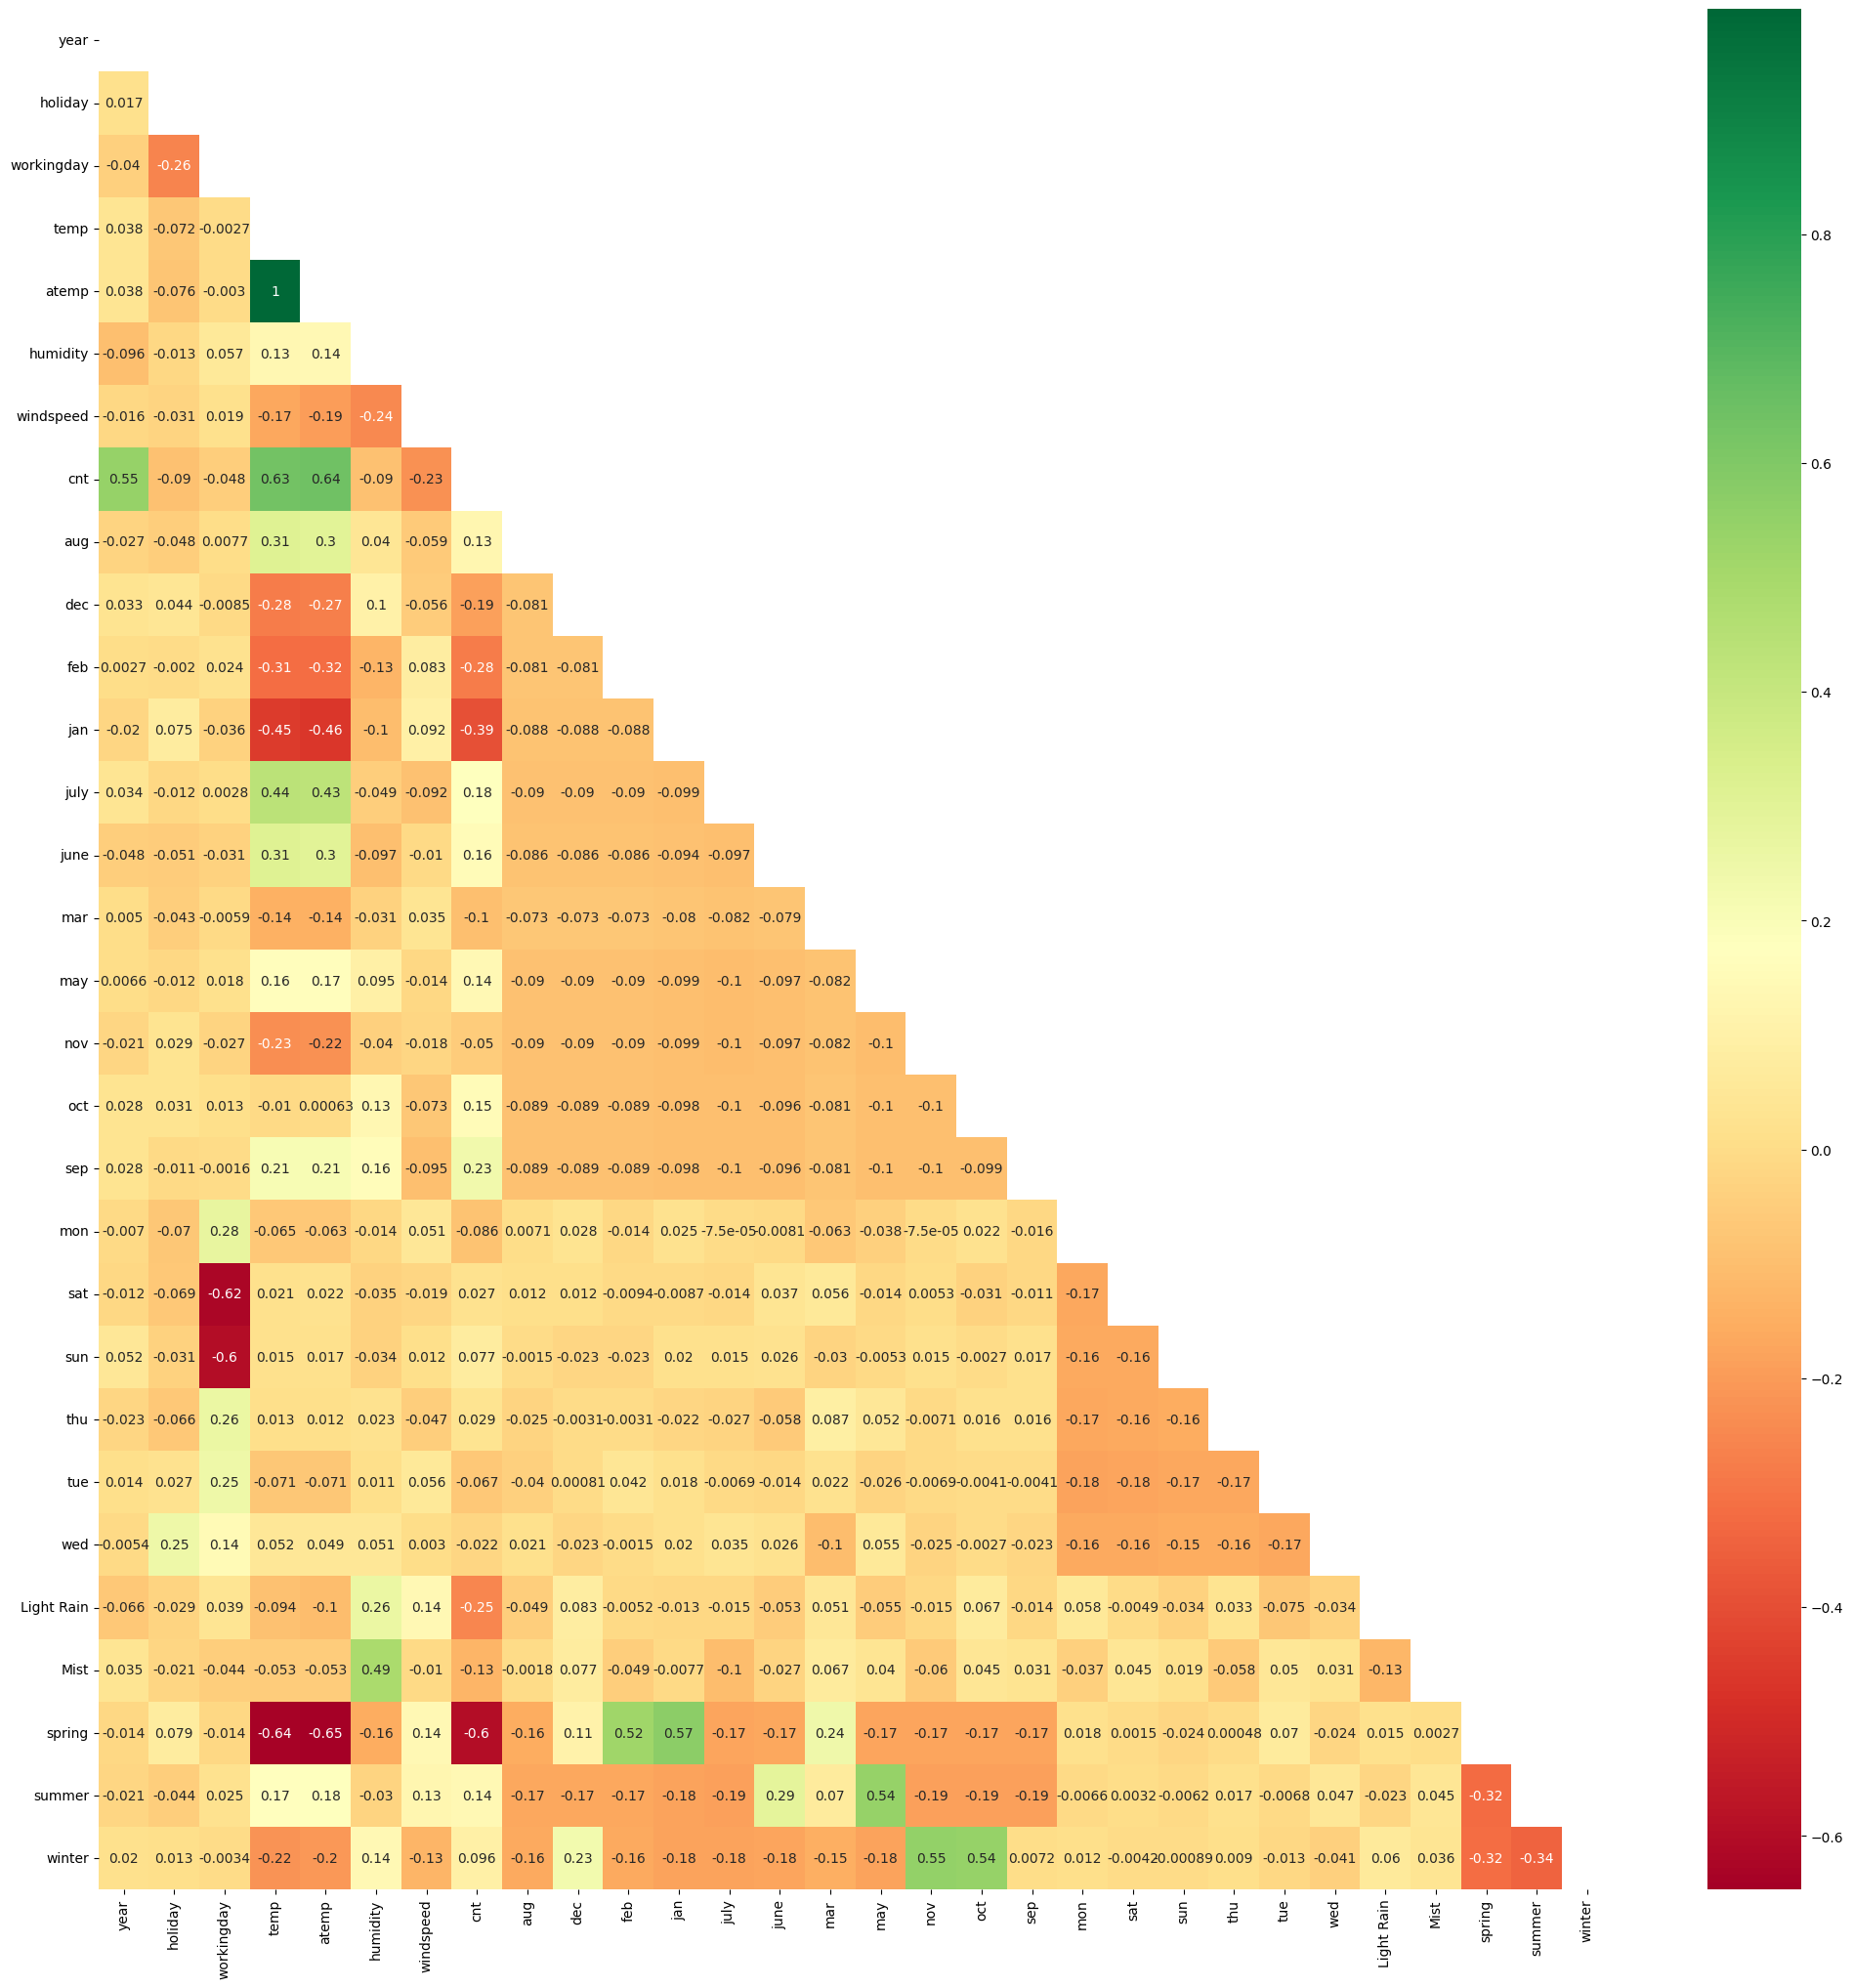

In [525]:
# Let's check the correlation coefficients to see which variables are highly correlated


# Compute the correlation matrix
corr_Defaulter = bike_train.corr()

# Use np.bool_ instead of np.bool
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape), k=1).astype(np.bool_))

# Unstack and reset index
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns = ['Feature1', 'Feature2', 'Correlation']

# Drop NaN values
corr_df_Defaulter.dropna(subset=["Correlation"], inplace=True)

# Take absolute values of correlations
corr_df_Defaulter["Correlation"] = corr_df_Defaulter["Correlation"].abs()

# Sort values by correlation
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)

# Get top 10 correlations
top_correlations = corr_df_Defaulter.head(10)

print("Top 10 correlations:")
print(top_correlations)

# Plot the heatmap
plt.figure(figsize=(25, 25))
matrix = np.triu(bike_train.corr())
sns.heatmap(bike_train.corr(), annot=True, cmap="RdYlGn", mask=matrix)
plt.show()


As you might have noticed, `atemp`, `temp`,"`spring` to the correlated to `cnt` the most. Also they all three themselves have strong correraltion which give indications of multicolaratery

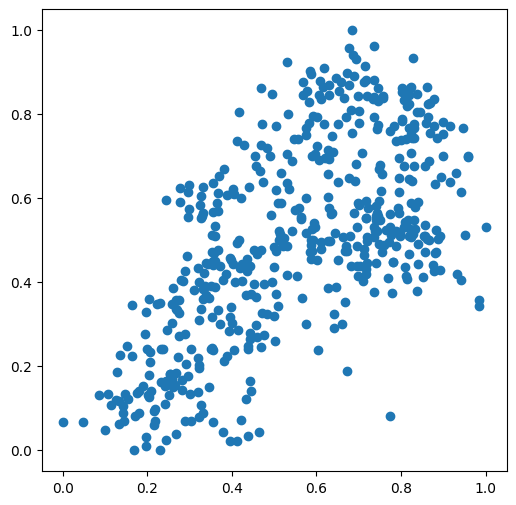

In [526]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(bike_train.temp, bike_train.cnt)
plt.show()

Visualization confirms the positive correlation between ```temp``` and ```cnt```.

So, we pick `temp` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [527]:
y_train = bike_train.pop('cnt')
X_train = bike_train

## Step 5: Building a linear model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [528]:
X_train.shape

(510, 29)

In [529]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [530]:

# Assuming X_train and y_train are already defined
lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=15)  # running RFE
rfe = rfe.fit(X_train, y_train)

# Get the selected feature indices
selected_features = rfe.support_

# Get the ranking of the features
feature_ranking = rfe.ranking_



In [531]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 12),
 ('dec', True, 1),
 ('feb', False, 8),
 ('jan', False, 14),
 ('july', True, 1),
 ('june', False, 9),
 ('mar', True, 1),
 ('may', False, 2),
 ('nov', True, 1),
 ('oct', False, 3),
 ('sep', True, 1),
 ('mon', False, 4),
 ('sat', False, 11),
 ('sun', False, 13),
 ('thu', False, 15),
 ('tue', False, 6),
 ('wed', False, 5),
 ('Light Rain', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1)]

In [532]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'atemp', 'humidity', 'windspeed', 'dec',
       'july', 'mar', 'nov', 'sep', 'Light Rain', 'Mist', 'spring', 'winter'],
      dtype='object')

In [533]:
X_train.columns[~rfe.support_]

Index(['workingday', 'aug', 'feb', 'jan', 'june', 'may', 'oct', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed', 'summer'],
      dtype='object')

In [534]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [535]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [536]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,atemp,1219.06
2,temp,1202.06
4,humidity,16.91
5,windspeed,5.29
14,winter,2.68
12,Mist,2.42
13,spring,2.41
0,year,2.11
9,nov,1.82
7,july,1.48


## Step 5: Building a linear model

##### Building 1st Linear Regression Model

In [537]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_1 = sm.add_constant(X_train_rfe)


In [538]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [539]:
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()


In [540]:
#Let's see the summary of our linear model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.0
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.67e-185
Time:                        23:39:21   Log-Likelihood:                 485.16
No. Observations:                 510   AIC:                            -938.3
Df Residuals:                     494   BIC:                            -870.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3031      0.032      9.393      0.0

Since ```humidity ```has VIF>10 we are going to drop this column `

In [541]:
X_train_new = X_train_rfe.drop(['temp'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,humidity,16.58
2,atemp,13.79
4,windspeed,5.00
13,winter,2.62
11,Mist,2.40
12,spring,2.39
0,year,2.10
8,nov,1.82
6,july,1.47
5,dec,1.36


##### Building 2nd linear regression model


In [542]:

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.7
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.21e-186
Time:                        23:39:56   Log-Likelihood:                 485.15
No. Observations:                 510   AIC:                            -940.3
Df Residuals:                     495   BIC:                            -876.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3028      0.032      9.418      0.0

In [543]:
X_train_new = X_train_new.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,atemp,5.38
3,windspeed,4.99
12,winter,2.38
0,year,2.09
11,spring,1.81
7,nov,1.79
10,Mist,1.57
5,july,1.43
4,dec,1.33
8,sep,1.23


##### Building 3rd linear regression model


In [544]:
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.78e-184
Time:                        23:40:30   Log-Likelihood:                 476.23
No. Observations:                 510   AIC:                            -924.5
Df Residuals:                     496   BIC:                            -865.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2413      0.029      8.292      0.0

Since all features are statistically significant and the multicollinearity is within acceptable limits, we can choose ```lr_3``` choose to keep all the features in the model. This model seems to be performing well with an R-squared of ```83.4%```.

## Step 6: Residual Analysis of the train data and validation

In [546]:
y_train_pred = lr_3.predict(X_train_lm_3)

#### Normality of error terms

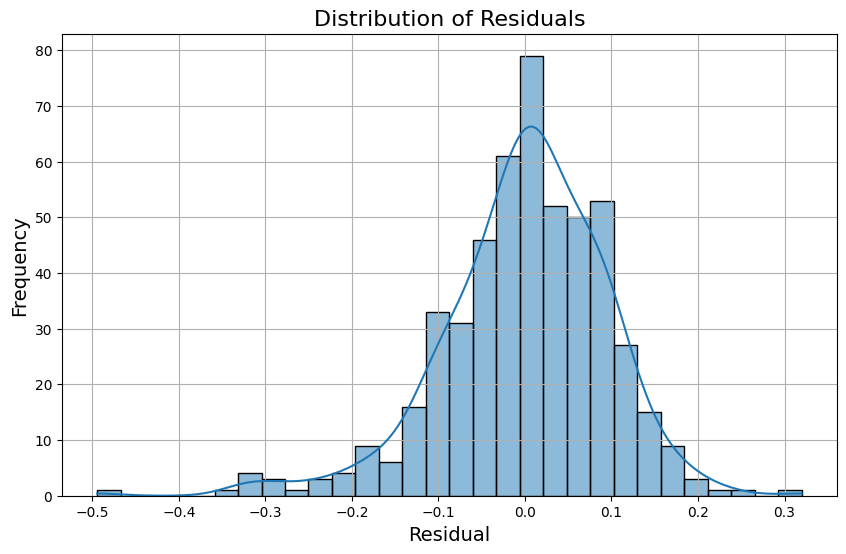

In [555]:
# Predicting and calculating residuals
y_train_pred = lr_3.predict(X_train_lm_3)
residual = y_train - y_train_pred

# Plotting the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residual, kde=True)
plt.xlabel('Residual', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Residuals', fontsize=16)
plt.grid(True)
plt.show()



Error terms are following normal distribution with slight ```right skewed```

X_train

In [556]:
X_train_new.shape

(510, 13)

# Check Heteroscedasticity

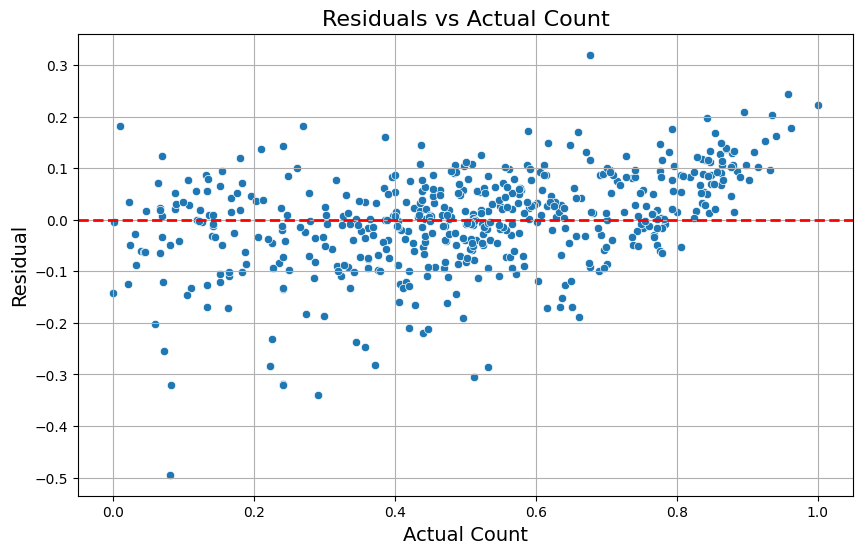

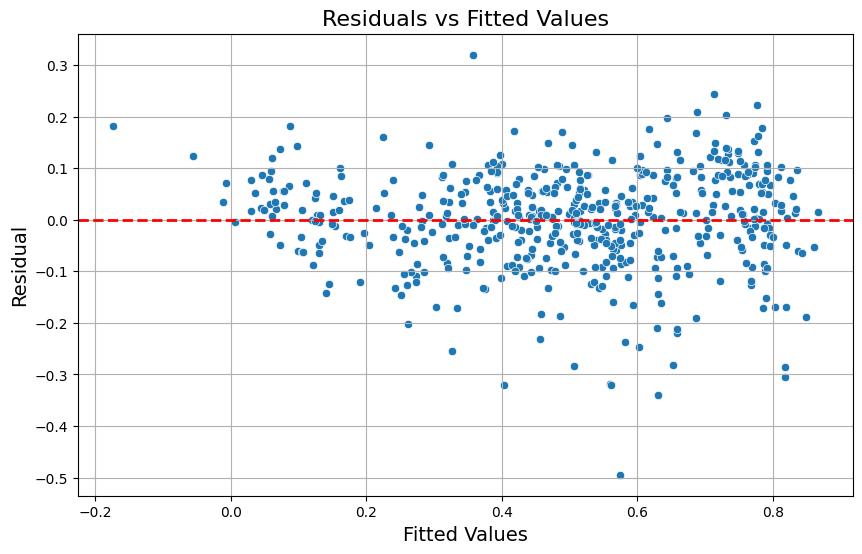

In [557]:
# Plotting residuals vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=residual)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Count', fontsize=14)
plt.ylabel('Residual', fontsize=14)
plt.title('Residuals vs Actual Count', fontsize=16)
plt.grid(True)
plt.show()



# Plotting residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_pred, y=residual)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Fitted Values', fontsize=14)
plt.ylabel('Residual', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=16)
plt.grid(True)
plt.show()



Insights

1. There seems to be no clear pattern in the residuals plots (Actual Count and Fitted Values). This suggests the model's errors are not systematically related to the actual values or the fitted values. This is a positive sign, indicating the model captures the general trend well.

2. There are hints of  ```Heteroscedasticity``` . Variance of the residuals might not be constant across different ranges of actual counts or fitted values. The spread of residuals seemed to be larger for higher actual counts and possibly higher fitted values.

In [560]:
X_train_lm_3.describe()

,const,year,holiday,atemp,windspeed,dec,july,mar,nov,sep,Light Rain,Mist,spring,winter
count,510.0,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,1.0,0.521569,0.027451,0.526680,0.461496,0.074510,0.092157,0.062745,0.092157,0.090196,0.029412,0.345098,0.231373,0.250980
std,0.0,0.500025,0.163554,0.213153,0.205402,0.262857,0.289531,0.242742,0.289531,0.286744,0.169124,0.475867,0.422124,0.434003
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.352585,0.314220,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,1.000000,0.000000,0.564951,0.427934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.000000,0.000000,0.698389,0.585898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.750000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e.3rd model.

In [562]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light Rain,Mist,spring,summer,winter
468,1,0,0,0.543115,0.536771,0.389097,0.470442,0.848606,0,0,...,0,1,0,0,0,0,0,0,1,0
148,0,0,1,0.758058,0.704203,0.801810,0.534705,0.526017,0,0,...,0,0,0,1,0,0,0,0,1,0
302,0,0,1,0.324018,0.317998,0.546995,0.430523,0.350115,0,0,...,0,0,0,1,0,0,0,0,0,1
355,0,0,0,0.453814,0.455552,0.721772,0.069462,0.318363,0,1,...,1,0,0,0,0,0,1,1,0,0
515,1,0,1,0.773634,0.724915,0.376030,0.482618,0.833877,0,0,...,0,0,0,0,0,0,0,0,1,0


In [563]:
bike_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light Rain,Mist,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.452055,0.031963,0.671233,0.527468,0.501760,0.530335,0.480685,0.479553,0.109589,0.109589,...,0.141553,0.164384,0.159817,0.114155,0.164384,0.027397,0.315068,0.283105,0.237443,0.228311
std,0.498836,0.176306,0.470841,0.229936,0.215759,0.193201,0.224522,0.233091,0.313092,0.313092,...,0.349389,0.371472,0.367276,0.318728,0.371472,0.163612,0.465607,0.451539,0.426491,0.420705
min,0.000000,0.000000,0.000000,0.047675,0.051010,0.000000,0.067718,-0.049378,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.324018,0.314694,0.391925,0.313353,0.285826,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.507811,0.496145,0.503437,0.464641,0.471206,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.726388,0.685028,0.665099,0.595473,0.644151,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.970925,0.939531,1.002722,1.000000,0.980804,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [564]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [565]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_3 = sm.add_constant(X_test)

In [566]:
y_pred=lr_3.predict(X_test_lm_3)

In [567]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8173

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

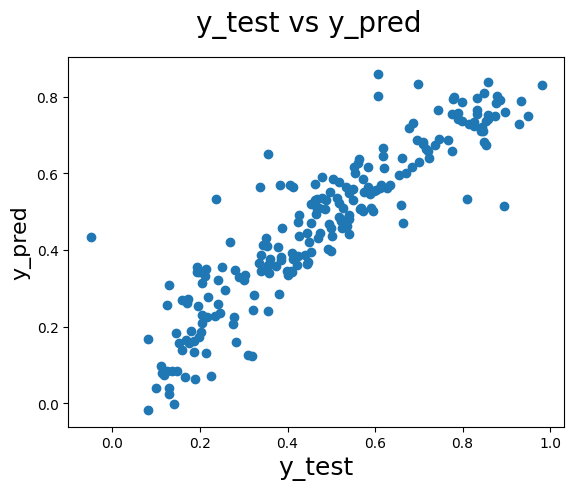

In [575]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [574]:
round(lr_3.params,4)

const         0.2413
year          0.2420
holiday      -0.0719
atemp         0.4373
windspeed    -0.0746
dec          -0.0676
july         -0.0523
mar           0.0515
nov          -0.0820
sep           0.0499
Light Rain   -0.2680
Mist         -0.0837
spring       -0.1617
winter        0.0823
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.2413 + 0.2420 \times  year -0.0719  \times  holiday + 0.4373 \times atemp - 0.0746 \times windspeed - 0.0676 \times dec  - 0.0523\times july + 0.0515\times mar -0.0820 \times nov + 0.0499 \times sep - 0.2680 \times Light_snowrain - 0.0787 \times Mist - 0.0554 \times spring +  0.0823 \times winter $

In [576]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8057


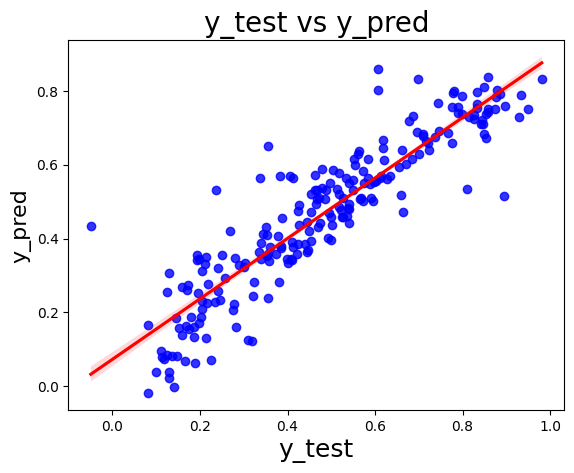

In [577]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [583]:
def adjusted_r2(r2, n, k):
    """
    Calculate the adjusted R^2 score.
    
    Parameters:
    r2 (float): The R^2 score.
    n (int): The number of observations.
    k (int): The number of predictors (excluding the constant term).
    
    Returns:
    float: The adjusted R^2 score.
    """
    return round(1 - (1 - r2) * (n - 1) / (n - k - 1), 4)

# Assuming you have the following data:
# X_train_new, y_train: training data and target
# X_test, y_test: testing data and target

# Fit the model on the training data
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train, X_train_lm_3).fit()

# Predictions
X_test_lm = sm.add_constant(X_test)
y_train_pred = lr_3.predict(X_train_lm_3)
y_test_pred = lr_3.predict(X_test_lm)

# R^2 scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Adjusted R^2 scores
train_adj_r2 = adjusted_r2(train_r2, X_train_new.shape[0], X_train_new.shape[1])
test_adj_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])

# Convert to percentages
train_r2_pct = round(train_r2 * 100, 2)
test_r2_pct = round(test_r2 * 100, 2)
train_adj_r2_pct = round(train_adj_r2 * 100, 2)
test_adj_r2_pct = round(test_adj_r2 * 100, 2)

# Create a DataFrame for the results
results_df = pd.DataFrame({
    'Metric': ['R^2', 'Adjusted R^2'],
    'Train Dataset (%)': [train_r2_pct, train_adj_r2_pct],
    'Test Dataset (%)': [test_r2_pct, test_adj_r2_pct]
})

# Extract coefficients
coefficients = lr_3.params

# Create a DataFrame for coefficients
coeff_df = pd.DataFrame(coefficients, columns=['Coefficient'])
coeff_df.reset_index(inplace=True)
coeff_df.columns = ['Feature', 'Coefficient']

# Display the results table
print(results_df)

# Display the coefficients table
print("\nCoefficients:")
print(coeff_df)


         Metric  Train Dataset (%)  Test Dataset (%)
0           R^2              83.43             81.73
1  Adjusted R^2              83.00             80.57

Coefficients:
       Feature  Coefficient
0        const     0.241261
1         year     0.241956
2      holiday    -0.071882
3        atemp     0.437283
4    windspeed    -0.074561
5          dec    -0.067618
6         july    -0.052282
7          mar     0.051536
8          nov    -0.081975
9          sep     0.049923
10  Light Rain    -0.268039
11        Mist    -0.083666
12      spring    -0.161679
13      winter     0.082323
